In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import shap
import json
import pandas as pd

# Load the merged training data
data_nonsubstance = ''

df_nonsubstance = pd.read_csv(data_nonsubstance)

# Display the first few rows to verify
print(df_nonsubstance .head())

/Users/jianfengzhu/miniconda3/envs/xgb/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   Unnamed: 0           author          created_utc  \
0           0    Hajimemeforme  2018-08-18 09:41:01   
1           1          Slayyr_  2018-12-11 04:15:04   
2           2       ScndChoice  2018-10-06 19:38:11   
3           3  Nomorebeatingit  2018-03-04 22:36:16   
4           4    cheeseman3715  2018-01-08 15:20:24   

                                            selftext  \
0  there is a day to celebrate love in our countr...   
1  \n\n\n\nliterally say anything to anyone, 80% ...   
2  i accidentally trew away all my notes for a ph...   
3  in the summer the sun is hot\nin fall and spri...   
4                                   t'is pretty good   

                                               title  subreddit  \
0                                               TIFU  teenagers   
1                 How to make friends in high school  teenagers   
2                  Am I retarded or just really dumb  teenagers   
3  guys and gals i figured out why the seasons ha...  teenagers 

In [ ]:
# Load the merged training data
data_substance = ''

df_substance = pd.read_csv(data_substance)

# Display the first few rows to verify
print(df_substance .head())

                author          created_utc  \
0            DylSan_07  2021-10-01 01:58:35   
1   SheldorBackOnline5  2021-10-01 02:58:09   
2  Beneficial-Egg-3445  2021-10-01 03:52:43   
3    ThrobbingMeatTube  2021-10-01 11:15:57   
4       Stupid15yoSlut  2021-10-01 11:52:31   

                                            selftext  \
0  many people got searched and there were rumors...   
1  every time i go out with my friends it’s alway...   
2  i'm in a hotel room with my grandparents for a...   
3  seriously she told me yesterday if i have a pr...   
4  im gaining weight from the craving of consumin...   

                                               title  subreddit  \
0  A kid got caught doing cocaine in the school b...  teenagers   
1                         My mother doesn’t trust me  teenagers   
2                                       Please help.  teenagers   
3  I fucking hate my business math teacher she te...  teenagers   
4              temporarily quitting weed. sor

In [104]:
df_substance['title'][3]

'I fucking hate my business math teacher she teaches like we are in the 20s and smells like cigarettes'

In [103]:
df_substance['selftext'][3]

'seriously she told me yesterday if i have a problem i can just leave so i just walked out'

In [4]:
import pandas as pd

def clean_influence_column(series, keyword):
    """
    Convert influence annotations to binary (0/1).
    - series: pandas Series (e.g., substance_df['Family Influence'])
    - keyword: keyword string, e.g. "family influence"
    """
    return series.apply(
        lambda x: 1 if isinstance(x, str) and keyword in x.lower() else 0
    )

# 应用到你的 DataFrame
df_substance['Family Influence'] = clean_influence_column(df_substance['Family Influence'], "family influence")
df_substance['Peer Influence'] = clean_influence_column(df_substance['Peer Influence'], "peer influence")
df_substance['School Environment'] = clean_influence_column(df_substance['School Environment'], "school environment")


In [5]:
df_substance.head(5)

,author,created_utc,selftext,title,subreddit,date,posts,emotion,substance,Family Influence,Peer Influence,School Environment
0,DylSan_07,2021-10-01 01:58:35,many people got searched and there were rumors...,A kid got caught doing cocaine in the school b...,teenagers,2021-10-01 01:58:35,kid got caught cocaine school bathrooms 26 peo...,disgust,1,0,1,1
1,SheldorBackOnline5,2021-10-01 02:58:09,every time i go out with my friends it’s alway...,My mother doesn’t trust me,teenagers,2021-10-01 02:58:09,mother ’ trust every time go friends ’ always ...,neutral,1,1,1,0
2,Beneficial-Egg-3445,2021-10-01 03:52:43,i'm in a hotel room with my grandparents for a...,Please help.,teenagers,2021-10-01 03:52:43,please help m hotel room grandparents wedding ...,disgust,1,0,0,0
3,ThrobbingMeatTube,2021-10-01 11:15:57,seriously she told me yesterday if i have a pr...,I fucking hate my business math teacher she te...,teenagers,2021-10-01 11:15:57,fucking hate business math teacher teaches lik...,anger,1,0,0,1
4,Stupid15yoSlut,2021-10-01 11:52:31,im gaining weight from the craving of consumin...,temporarily quitting weed. sorry guys,teenagers,2021-10-01 11:52:31,temporarily quitting weed sorry guys im gainin...,guilt,1,0,1,0


In [14]:
import pandas as pd

# Assuming df1 and df2 are your two DataFrames
combined_df = pd.concat([df_substance , df_nonsubstance], ignore_index=True)


In [15]:
combined_df.shape

(38950, 13)

In [16]:
combined_df.columns

Index(['author', 'created_utc', 'selftext', 'title', 'subreddit', 'date',
       'posts', 'emotion', 'substance', 'Family Influence', 'Peer Influence',
       'School Environment', 'Unnamed: 0'],
      dtype='object')

In [17]:
combined_df.head(3)

,author,created_utc,selftext,title,subreddit,date,posts,emotion,substance,Family Influence,Peer Influence,School Environment,Unnamed: 0
0,DylSan_07,2021-10-01 01:58:35,many people got searched and there were rumors...,A kid got caught doing cocaine in the school b...,teenagers,2021-10-01 01:58:35,kid got caught cocaine school bathrooms 26 peo...,disgust,1,0,1,1,NaN
1,SheldorBackOnline5,2021-10-01 02:58:09,every time i go out with my friends it’s alway...,My mother doesn’t trust me,teenagers,2021-10-01 02:58:09,mother ’ trust every time go friends ’ always ...,neutral,1,1,1,0,NaN
2,Beneficial-Egg-3445,2021-10-01 03:52:43,i'm in a hotel room with my grandparents for a...,Please help.,teenagers,2021-10-01 03:52:43,please help m hotel room grandparents wedding ...,disgust,1,0,0,0,NaN


In [18]:
import pandas as pd

# Assuming combined_df is your DataFrame
# Perform one-hot encoding on the 'emotion' column
combined_df = pd.get_dummies(combined_df, columns=['emotion'], drop_first=False)

# Display the first few rows to verify
print(combined_df.head())


                author          created_utc  \
0            DylSan_07  2021-10-01 01:58:35   
1   SheldorBackOnline5  2021-10-01 02:58:09   
2  Beneficial-Egg-3445  2021-10-01 03:52:43   
3    ThrobbingMeatTube  2021-10-01 11:15:57   
4       Stupid15yoSlut  2021-10-01 11:52:31   

                                            selftext  \
0  many people got searched and there were rumors...   
1  every time i go out with my friends it’s alway...   
2  i'm in a hotel room with my grandparents for a...   
3  seriously she told me yesterday if i have a pr...   
4  im gaining weight from the craving of consumin...   

                                               title  subreddit  \
0  A kid got caught doing cocaine in the school b...  teenagers   
1                         My mother doesn’t trust me  teenagers   
2                                       Please help.  teenagers   
3  I fucking hate my business math teacher she te...  teenagers   
4              temporarily quitting weed. sor

In [ ]:
combined_df.to_csv('')

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd
combined_df = pd.read_csv('')
emotion_cols = ["emotion_joy", "emotion_guilt", "emotion_anger", 
                "emotion_disgust", "emotion_fear", "emotion_sadness", "emotion_shame","emotion_neutral"]

results_emotion = []

for emo in emotion_cols:
    group1 = combined_df[combined_df["substance"] == 1][emo].astype(int)
    group0 = combined_df[combined_df["substance"] == 0][emo].astype(int)
    
    t, p = ttest_ind(group1, group0, equal_var=False)
    
    # 🔹 effect size: risk difference
    risk_diff = group1.mean() - group0.mean()
    
    results_emotion.append({
        "Emotion": emo.replace("emotion_", "").capitalize(),
        "M(SD) Substance": f"{group1.mean():.3f} ({group1.std():.3f})",
        "M(SD) Non-Substance": f"{group0.mean():.3f} ({group0.std():.3f})",
        "Risk Difference (Δp)": round(risk_diff, 3),
        "t": round(t, 3),
        "p": "<.001" if p < 0.001 else round(p, 3)
    })

df_emotion_results = pd.DataFrame(results_emotion)
print(df_emotion_results)


   Emotion M(SD) Substance M(SD) Non-Substance  Risk Difference (Δp)       t  \
0      Joy   0.149 (0.356)       0.225 (0.417)                -0.076 -18.998   
1    Guilt   0.076 (0.266)       0.032 (0.175)                 0.045  19.931   
2    Anger   0.160 (0.367)       0.173 (0.378)                -0.012  -3.260   
3  Disgust   0.134 (0.341)       0.099 (0.299)                 0.035  10.769   
4     Fear   0.145 (0.352)       0.124 (0.329)                 0.021   5.963   
5  Sadness   0.200 (0.400)       0.189 (0.392)                 0.011   2.671   
6    Shame   0.042 (0.200)       0.036 (0.185)                 0.006   3.221   
7  Neutral   0.094 (0.291)       0.123 (0.329)                -0.029  -9.287   

       p  
0  <.001  
1  <.001  
2  0.001  
3  <.001  
4  <.001  
5  0.008  
6  0.001  
7  <.001  


In [3]:
from scipy.stats import ttest_ind
import pandas as pd

context_cols = ["Family Influence", "Peer Influence", "School Environment"]

results_context = []

for ctx in context_cols:
    group1 = combined_df[combined_df["substance"] == 1][ctx].astype(int)
    group0 = combined_df[combined_df["substance"] == 0][ctx].astype(int)
    
    t, p = ttest_ind(group1, group0, equal_var=False)
    
    # 🔹 effect size: risk difference (Δp)
    risk_diff = group1.mean() - group0.mean()
    
    results_context.append({
        "Context": ctx,
        "M(SD) Substance": f"{group1.mean():.3f} ({group1.std():.3f})",
        "M(SD) Non-Substance": f"{group0.mean():.3f} ({group0.std():.3f})",
        "Risk Difference (Δp)": round(risk_diff, 3),
        "t": round(t, 3),
        "p": "<.001" if p < 0.001 else round(p, 3)
    })

df_context_results = pd.DataFrame(results_context)
print(df_context_results)


              Context M(SD) Substance M(SD) Non-Substance  \
0    Family Influence   0.210 (0.407)       0.088 (0.283)   
1      Peer Influence   0.716 (0.451)       0.407 (0.491)   
2  School Environment   0.108 (0.311)       0.104 (0.306)   

   Risk Difference (Δp)       t      p  
0                 0.122  34.610  <.001  
1                 0.310  64.316  <.001  
2                 0.004   1.326  0.185  


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
#df = pd.read_csv('/Users/jianfengzhu/Research Work/2Substance_contextual_Method/2Substance_MH_ComparativeAnalysisPaperFolder/Teenagers_MH_18_24_Anlaysis_Folder/DEC_2025Experiment/FinalcombinedData_to_Analysis.csv')
# 举例: sadness vs substance
contingency = pd.crosstab(combined_df['substance'], combined_df['emotion_sadness'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square test for sadness:")
print("Chi2 =", chi2, "p =", p)
print(contingency, "\n")

# 对所有 emotion/context 一次性跑
features = ['emotion_sadness', 'emotion_fear', 'emotion_guilt', 
            'emotion_joy', 'emotion_shame', 'emotion_disgust', 'emotion_neutral',
            'Family Influence', 'Peer Influence', 'School Environment']

results = []
for f in features:
    table = pd.crosstab(combined_df['substance'], combined_df[f])
    chi2, p, dof, expected = chi2_contingency(table)
    results.append((f, chi2, p))

pd.DataFrame(results, columns=['Feature', 'Chi2', 'p_value'])


Chi-square test for sadness:
Chi2 = 7.038131249050331 p = 0.007979224433648685
emotion_sadness  False  True 
substance                    
0                14419   3362
1                16939   4230 



,Feature,Chi2,p_value
0,emotion_sadness,7.038131,7.979224e-03
1,emotion_fear,34.946477,3.388940e-09
2,emotion_guilt,366.510434,1.076441e-81
3,emotion_joy,366.919019,8.770546e-82
4,emotion_shame,10.064011,1.511937e-03
5,emotion_disgust,112.725119,2.478622e-26
6,emotion_neutral,87.567684,8.144453e-21
7,Family Influence,1095.013697,4.005268e-240
8,Peer Influence,3789.099280,0.000000e+00
9,School Environment,1.709168,1.910934e-01


In [22]:
# 统计substance vs non-substance的帖子数量
substance_counts = combined_df['substance'].value_counts()

print(substance_counts)


substance
1    21169
0    17781
Name: count, dtype: int64


In [21]:
context_cols = ["Family Influence", "Peer Influence", "School Environment"]

results_context = []

for ctx in context_cols:
    group1 = combined_df[combined_df["substance"] == 1][ctx]
    group0 = combined_df[combined_df["substance"] == 0][ctx]
    
    t, p = ttest_ind(group1, group0, equal_var=False)
    results_context.append({
        "Context": ctx,
        "M(SD) Substance": f"{group1.mean():.3f} ({group1.std():.3f})",
        "M(SD) Non-Substance": f"{group0.mean():.3f} ({group0.std():.3f})",
        "t": round(t, 3),
        "p": "<.001" if p < 0.001 else round(p, 3)
    })

df_context_results = pd.DataFrame(results_context)
print(df_context_results)


              Context M(SD) Substance M(SD) Non-Substance       t      p
0    Family Influence   0.210 (0.407)       0.088 (0.283)  34.610  <.001
1      Peer Influence   0.716 (0.451)       0.407 (0.491)  64.316  <.001
2  School Environment   0.108 (0.311)       0.104 (0.306)   1.326  0.185


In [26]:
import pandas as pd
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import collections


# Exclude specific columns
df = combined_df.drop(columns=['author', 'created_utc', 'selftext', 'title', 'subreddit', 'date','posts'])
# Prepare features and target
X = df.drop(columns=['substance','Unnamed: 0'])


In [27]:
X 

,Family Influence,Peer Influence,School Environment,emotion_anger,emotion_disgust,emotion_fear,emotion_guilt,emotion_joy,emotion_neutral,emotion_sadness,emotion_shame
0,0,1,1,False,True,False,False,False,False,False,False
1,1,1,0,False,False,False,False,False,True,False,False
2,0,0,0,False,True,False,False,False,False,False,False
3,0,0,1,True,False,False,False,False,False,False,False
4,0,1,0,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
38945,1,0,0,False,True,False,False,False,False,False,False
38946,0,0,0,False,False,True,False,False,False,False,False
38947,0,0,0,False,False,False,False,False,True,False,False
38948,0,1,0,False,False,False,False,True,False,False,False


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'df' is the DataFrame after cleaning
# Prepare features and target

y = df['substance']                 # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Fit each model, calculate accuracy, and select the best one
best_model = None
best_accuracy = 0
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

# Display accuracies of each model
print("Model Accuracies:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

print(f"\nBest model: {best_model} with accuracy of {best_accuracy:.4f}")


Model Accuracies:
Logistic Regression: 0.6708
Random Forest: 0.6704
Support Vector Classifier: 0.6704
Gradient Boosting: 0.6706

Best model: Logistic Regression with accuracy of 0.6708


Accuracy: 0.6704

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.57      0.61      5332
           1       0.68      0.75      0.71      6353

    accuracy                           0.67     11685
   macro avg       0.67      0.66      0.66     11685
weighted avg       0.67      0.67      0.67     11685



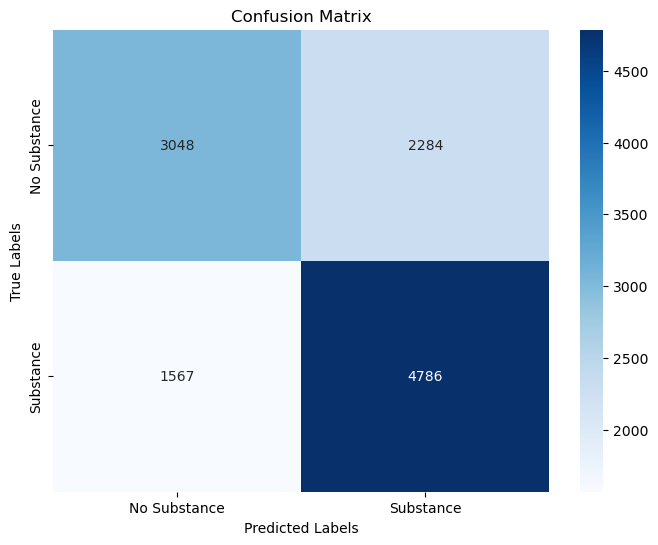


Feature Importances:
               Feature  Importance
1       Peer Influence    0.496362
4      emotion_disgust    0.128233
0     Family Influence    0.108953
6        emotion_guilt    0.071479
7          emotion_joy    0.045282
5         emotion_fear    0.040112
8      emotion_neutral    0.035033
2   School Environment    0.024188
9      emotion_sadness    0.020971
3        emotion_anger    0.020347
10       emotion_shame    0.009039


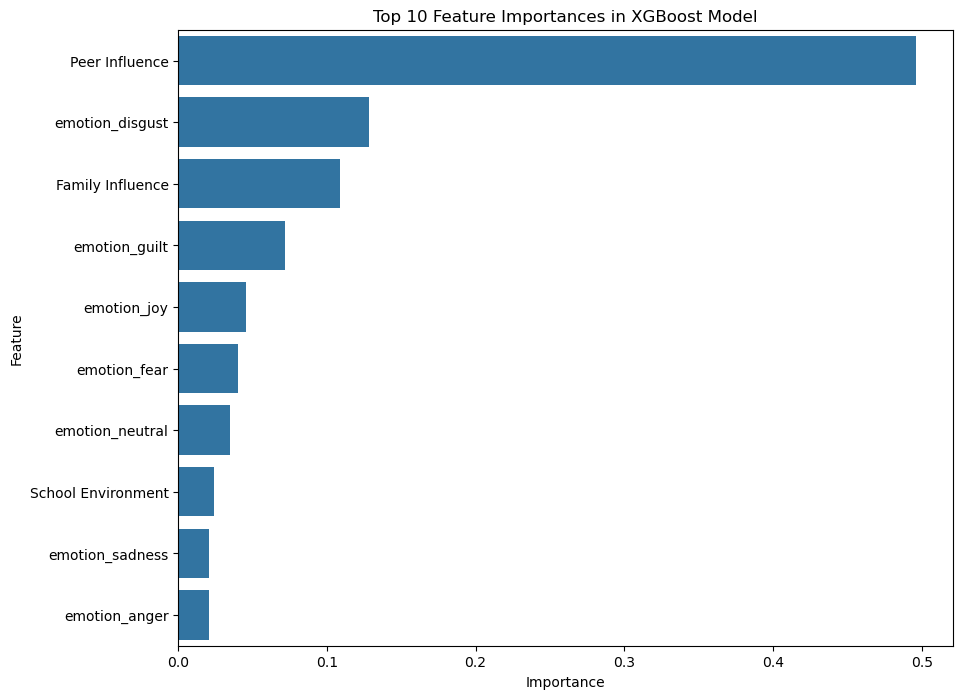

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Assuming 'df' is the DataFrame after cleaning and 'substance' is the target

y = df['substance']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Set eval_metric to avoid warning
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No Substance', 'Substance'], yticklabels=['No Substance', 'Substance'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Feature importance
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))  # Show top 10 important features
plt.title("Top 10 Feature Importances in XGBoost Model")
plt.show()


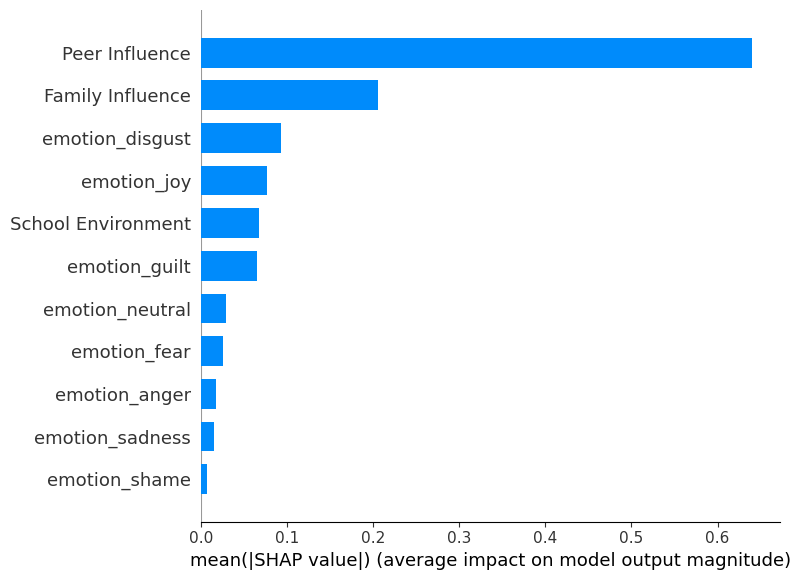

In [93]:
import shap
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train_sx1 and y_train_sx1 contain your training data
# Fit the XGBoost model (using your actual data)
xgb_model_sx1 = xgb.XGBClassifier()
xgb_model_sx1.fit(X, y)  # Replace with your training data

# Create SHAP explainer with the trained model
explainer = shap.Explainer(xgb_model_sx1)

# Get SHAP values for the test set
shap_values = explainer(X_test)

# Display the SHAP bar plot for global feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


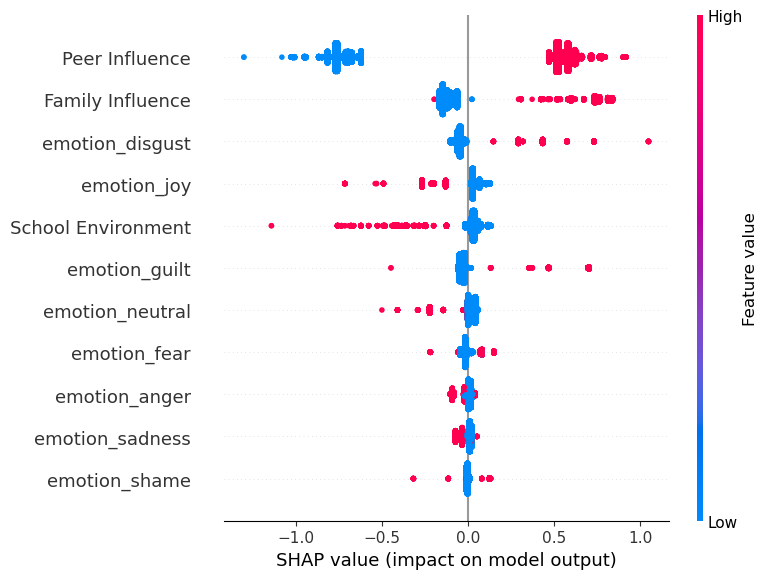

In [94]:
# Display the SHAP beeswarm plot for global feature importance
shap.summary_plot(shap_values, X_test)  # Default is beeswarm plo

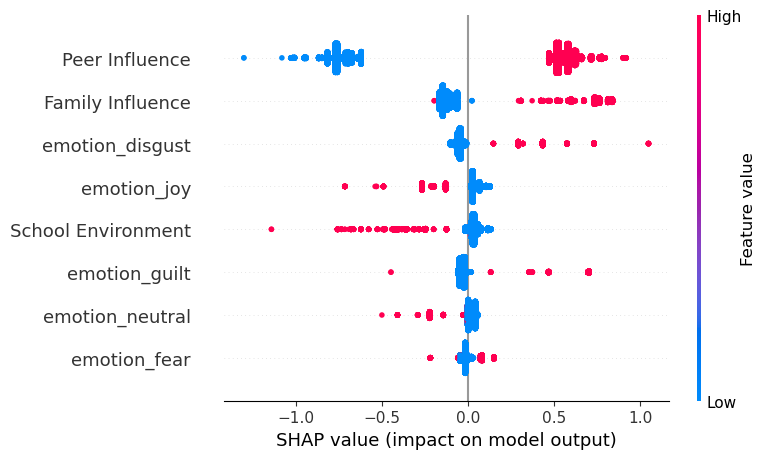

In [95]:
shap.summary_plot(shap_values, X_test, max_display=8)

In [60]:
combined_df.columns

Index(['author', 'created_utc', 'selftext', 'title', 'subreddit', 'date',
       'posts', 'substance', 'Family Influence', 'Peer Influence',
       'School Environment', 'Unnamed: 0', 'emotion_anger', 'emotion_disgust',
       'emotion_fear', 'emotion_guilt', 'emotion_joy', 'emotion_neutral',
       'emotion_sadness', 'emotion_shame'],
      dtype='object')

In [63]:
combined_df.head(5)

,author,created_utc,selftext,title,subreddit,date,posts,substance,Family Influence,Peer Influence,School Environment,Unnamed: 0,emotion_anger,emotion_disgust,emotion_fear,emotion_guilt,emotion_joy,emotion_neutral,emotion_sadness,emotion_shame
0,DylSan_07,2021-10-01 01:58:35,many people got searched and there were rumors...,A kid got caught doing cocaine in the school b...,teenagers,2021-10-01 01:58:35,kid got caught cocaine school bathrooms 26 peo...,1,0,1,1,NaN,False,True,False,False,False,False,False,False
1,SheldorBackOnline5,2021-10-01 02:58:09,every time i go out with my friends it’s alway...,My mother doesn’t trust me,teenagers,2021-10-01 02:58:09,mother ’ trust every time go friends ’ always ...,1,1,1,0,NaN,False,False,False,False,False,True,False,False
2,Beneficial-Egg-3445,2021-10-01 03:52:43,i'm in a hotel room with my grandparents for a...,Please help.,teenagers,2021-10-01 03:52:43,please help m hotel room grandparents wedding ...,1,0,0,0,NaN,False,True,False,False,False,False,False,False
3,ThrobbingMeatTube,2021-10-01 11:15:57,seriously she told me yesterday if i have a pr...,I fucking hate my business math teacher she te...,teenagers,2021-10-01 11:15:57,fucking hate business math teacher teaches lik...,1,0,0,1,NaN,True,False,False,False,False,False,False,False
4,Stupid15yoSlut,2021-10-01 11:52:31,im gaining weight from the craving of consumin...,temporarily quitting weed. sorry guys,teenagers,2021-10-01 11:52:31,temporarily quitting weed sorry guys im gainin...,1,0,1,0,NaN,False,False,False,True,False,False,False,False


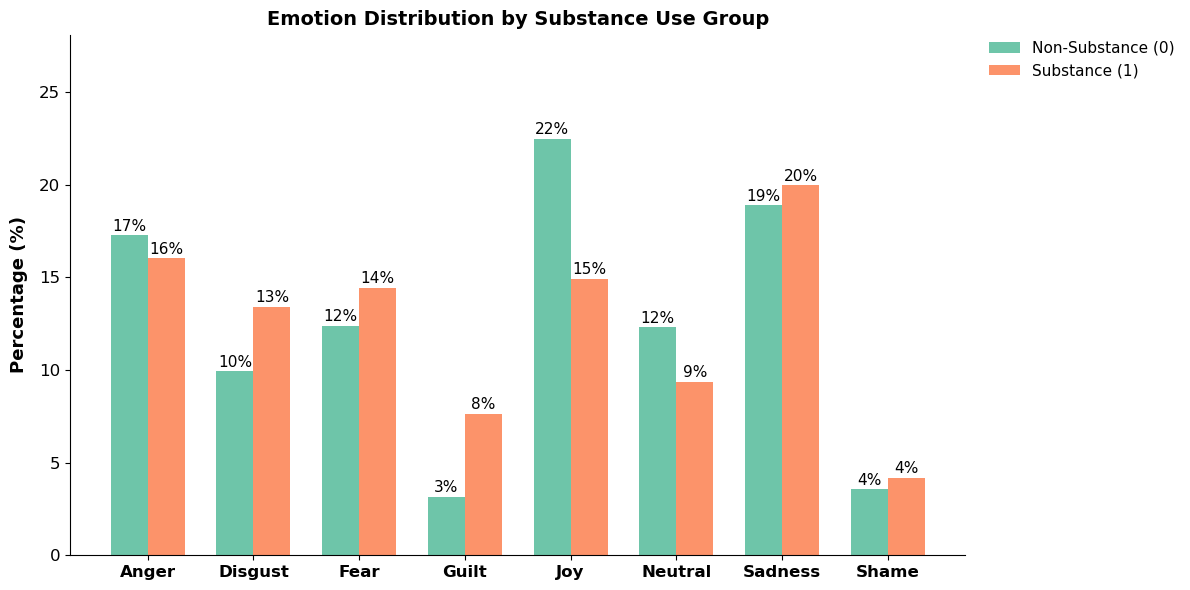

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1. 自动统计百分比
emotion_features = ['emotion_anger', 'emotion_disgust', 'emotion_fear', 'emotion_guilt',
                    'emotion_joy', 'emotion_neutral', 'emotion_sadness', 'emotion_shame']

df = combined_df.copy()
for feat in emotion_features:
    df[feat] = df[feat].fillna(False).astype(int)
df['substance'] = df['substance'].astype(int)

result = []
for feat in emotion_features:
    total0 = (df['substance'] == 0).sum()
    pct0 = df.loc[df['substance']==0, feat].sum() / total0 * 100 if total0 > 0 else 0
    total1 = (df['substance'] == 1).sum()
    pct1 = df.loc[df['substance']==1, feat].sum() / total1 * 100 if total1 > 0 else 0
    result.append({'Emotion': feat.replace('emotion_', '').capitalize(),
                   'Non-Substance': pct0, 'Substance': pct1})

plot_df = pd.DataFrame(result)
non_sub_pct = plot_df['Non-Substance'].tolist()
sub_pct     = plot_df['Substance'].tolist()
emotion_names = plot_df['Emotion'].tolist()

# Step 2. 画高分论文主图（Nature风格）
color_ns = "#66C2A5"
color_s  = "#FC8D62"
bar_width = 0.35
x = np.arange(len(emotion_names))

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - bar_width/2, non_sub_pct, width=bar_width, color=color_ns, label='Non-Substance (0)', alpha=0.95)
bars2 = ax.bar(x + bar_width/2, sub_pct,     width=bar_width, color=color_s,  label='Substance (1)', alpha=0.95)

ax.set_xticks(x)
ax.set_xticklabels(emotion_names, fontsize=12, fontweight='bold', rotation=0)
ax.set_ylabel('Percentage (%)', fontsize=13, fontweight='bold', labelpad=8)
ax.set_ylim(0, max(non_sub_pct + sub_pct) * 1.25)
ax.set_title('Emotion Distribution by Substance Use Group', fontsize=14, fontweight='bold', pad=7)
ax.tick_params(axis='y', labelsize=12)
ax.spines[['top','right']].set_visible(False)
ax.bar_label(bars1, labels=[f"{v:.0f}%" for v in non_sub_pct], label_type='edge', fontsize=11, padding=1)
ax.bar_label(bars2, labels=[f"{v:.0f}%" for v in sub_pct], label_type='edge', fontsize=11, padding=1)
ax.legend(fontsize=11, frameon=False, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.subplots_adjust(left=0.09, right=0.80, top=0.90, bottom=0.13)
plt.tight_layout()
plt.show()


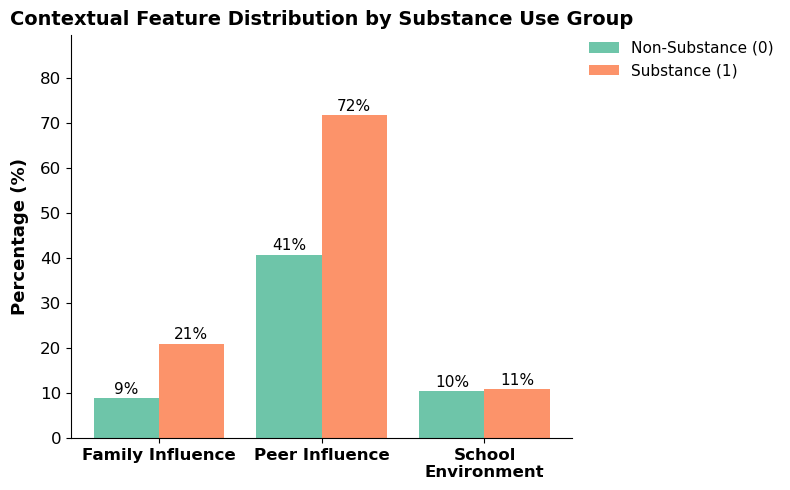

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1. 自动统计 context 特征的 substance=0/1 百分比
context_features = ['Family Influence', 'Peer Influence', 'School Environment']

df = combined_df.copy()
for feat in context_features:
    df[feat] = df[feat].fillna(False).astype(int)
df['substance'] = df['substance'].astype(int)

result_c = []
for feat in context_features:
    total0 = (df['substance'] == 0).sum()
    pct0 = df.loc[df['substance']==0, feat].sum() / total0 * 100 if total0 > 0 else 0
    total1 = (df['substance'] == 1).sum()
    pct1 = df.loc[df['substance']==1, feat].sum() / total1 * 100 if total1 > 0 else 0
    result_c.append({'Context': feat.replace('', '').replace('School ', 'School\n'),
                     'Non-Substance': pct0, 'Substance': pct1})

plot_df_c = pd.DataFrame(result_c)
context_names = plot_df_c['Context'].tolist()
non_sub_pct_c = plot_df_c['Non-Substance'].tolist()
sub_pct_c     = plot_df_c['Substance'].tolist()

# Step 2. 画高分论文主图（Nature风格）
color_ns = "#66C2A5"
color_s  = "#FC8D62"
bar_width = 0.4
x = np.arange(len(context_names))

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - bar_width/2, non_sub_pct_c, width=bar_width, color=color_ns, label='Non-Substance (0)', alpha=0.95)
bars2 = ax.bar(x + bar_width/2, sub_pct_c,     width=bar_width, color=color_s,  label='Substance (1)', alpha=0.95)

ax.set_xticks(x)
ax.set_xticklabels(context_names, fontsize=12, fontweight='bold', rotation=0)
ax.set_ylabel('Percentage (%)', fontsize=13, fontweight='bold', labelpad=8)
ax.set_ylim(0, max(non_sub_pct_c + sub_pct_c) * 1.25)
ax.set_title('Contextual Feature Distribution by Substance Use Group', fontsize=14, fontweight='bold', pad=7)
ax.tick_params(axis='y', labelsize=12)
ax.spines[['top','right']].set_visible(False)
ax.bar_label(bars1, labels=[f"{v:.0f}%" for v in non_sub_pct_c], label_type='edge', fontsize=11, padding=1)
ax.bar_label(bars2, labels=[f"{v:.0f}%" for v in sub_pct_c], label_type='edge', fontsize=11, padding=1)
ax.legend(fontsize=11, frameon=False, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.subplots_adjust(left=0.13, right=0.80, top=0.90, bottom=0.13)
plt.tight_layout()
plt.show()


In [66]:
context_features = ['Family Influence', 'Peer Influence', 'School Environment']

df = combined_df.copy()
for feat in context_features:
    df[feat] = df[feat].fillna(False).astype(int)
df['substance'] = df['substance'].astype(int)

# 统计每个context特征在substance=0/1组的出现占比
result_c = []
for feat in context_features:
    total0 = (df['substance'] == 0).sum()
    pct0 = df.loc[df['substance']==0, feat].sum() / total0 * 100 if total0 > 0 else 0
    total1 = (df['substance'] == 1).sum()
    pct1 = df.loc[df['substance']==1, feat].sum() / total1 * 100 if total1 > 0 else 0
    result_c.append({'Context': feat.replace(' Influence', '').replace('School ', 'School\n'),  # 换行更美观
                     'Non-Substance': pct0, 'Substance': pct1})

plot_df_c = pd.DataFrame(result_c)
context_names = plot_df_c['Context'].tolist()
non_sub_pct_c = plot_df_c['Non-Substance'].tolist()
sub_pct_c     = plot_df_c['Substance'].tolist()


In [78]:
emotion_features = ['emotion_anger', 'emotion_disgust', 'emotion_fear', 'emotion_guilt',
                    'emotion_joy', 'emotion_neutral', 'emotion_sadness', 'emotion_shame']
context_features = ['Family Influence', 'Peer Influence', 'School Environment']

df = combined_df.copy()
for feat in emotion_features + context_features:
    df[feat] = df[feat].fillna(False).astype(int)

# 按 substance 分组
df_sub0 = df[df['substance']==0]
df_sub1 = df[df['substance']==1]

# 相关矩阵（以皮尔逊相关为例，可选 point-biserial）
def corr_matrix(contexts, emotions, data):
    mat = np.zeros((len(emotions), len(contexts)))
    for i, e in enumerate(emotions):
        for j, c in enumerate(contexts):
            if data[c].nunique() > 1 and data[e].nunique() > 1:
                mat[i, j] = data[e].corr(data[c])
            else:
                mat[i, j] = np.nan
    return pd.DataFrame(mat, index=emotions, columns=contexts)

corr_sub0 = corr_matrix(context_features, emotion_features, df_sub0)
corr_sub1 = corr_matrix(context_features, emotion_features, df_sub1)


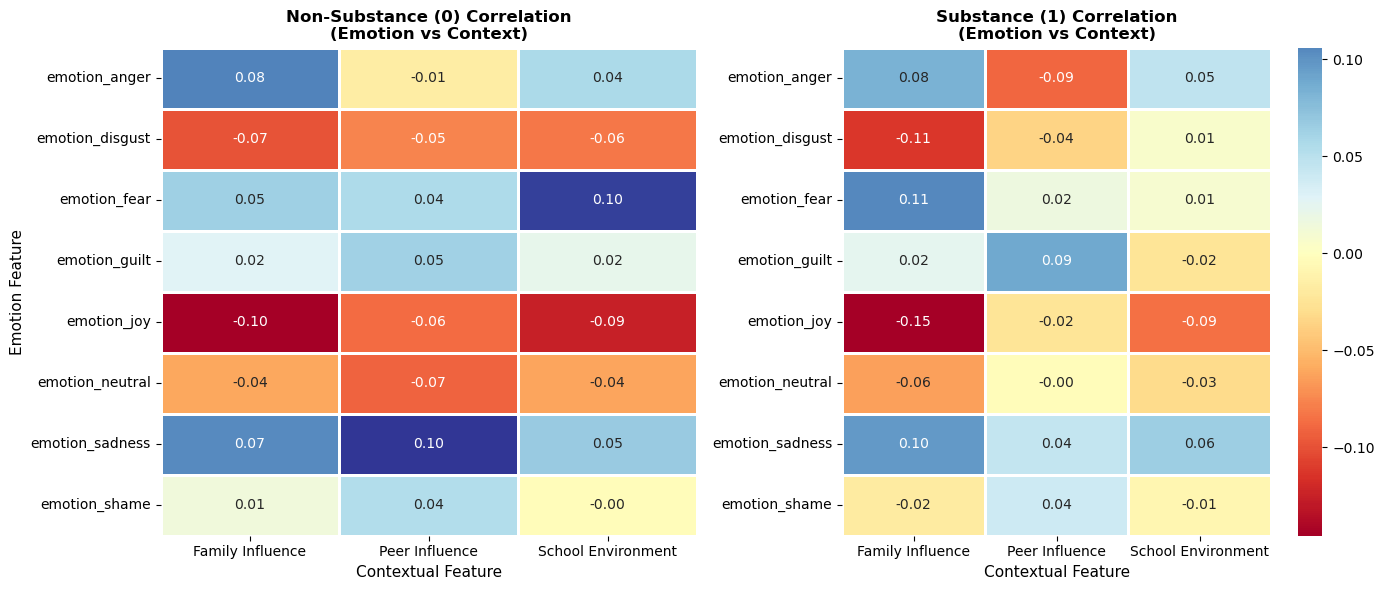

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.heatmap(corr_sub0, annot=True, cmap='RdYlBu', center=0, linewidths=0.8, cbar=False, fmt=".2f")
plt.title('Non-Substance (0) Correlation\n(Emotion vs Context)', fontsize=12, fontweight='bold')
plt.xlabel('Contextual Feature', fontsize=11)
plt.ylabel('Emotion Feature', fontsize=11)

plt.subplot(1,2,2)
sns.heatmap(corr_sub1, annot=True, cmap='RdYlBu', center=0, linewidths=0.8, cbar=True, fmt=".2f")
plt.title('Substance (1) Correlation\n(Emotion vs Context)', fontsize=12, fontweight='bold')
plt.xlabel('Contextual Feature', fontsize=11)
plt.ylabel('')

plt.tight_layout()
plt.show()
